# FD_Detector Preprocessing

In [37]:
import pandas as pd 
import random
import numpy as np
import os
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array

### Global Variables

In [38]:
batch_size = 32
seed=42
default_image_size = tuple((256, 256))
image_size = 0
directory_root = r"C:/Users/claud/Desktop/DEV IA/SEM 16/FD Detector/Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation/"
img_width=160
img_height=160
depth=3
tf.random.set_seed(seed)

In [39]:
disease_types = [
                'Apple___Apple_scab',
                'Apple___Black_rot',
                'Apple___Cedar_apple_rust',
                'Apple___healthy',
                
                'Blueberry___healthy',
                'Cherry___healthy',
                'Cherry___Powdery_mildew',
                'Corn___Cercospora_leaf_spot Gray_leaf_spot',
                'Corn___Common_rust',
                'Corn___healthy',
                'Corn___Northern_Leaf_Blight',
                'Grape___Black_rot',
                'Grape___Esca_(Black_Measles)',
                'Grape___healthy',
                'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                'Orange___Haunglongbing_(Citrus_greening)',
                'Peach___Bacterial_spot',
                'Peach___healthy',
                'Pepper,_bell___Bacterial_spot',
                'Pepper,_bell___healthy',
                'Potato___Early_blight',
                'Potato___healthy',
                'Potato___Late_blight',
                'Raspberry___healthy',
                'Soybean___healthy',
                'Squash___Powdery_mildew',
                'Strawberry___healthy',
                'Strawberry___Leaf_scorch',
                'Tomato___Bacterial_spot',
                'Tomato___Early_blight',
                'Tomato___healthy',
                'Tomato___Late_blight',
                'Tomato___Leaf_Mold',
                'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite',
                'Tomato___Target_Spot',
                'Tomato___Tomato_mosaic_virus',
                'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
                ]

data_dir = os.path.join(directory_root)

In [40]:
data_ls = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(data_dir, sp)):
        data_ls.append(['{}/{}'.format(sp, file), defects_id, sp])
        
data = pd.DataFrame(data_ls, columns=['File_path_dir', 'Disease_ID','Disease Type'])
data.tail()

,File_path_dir,Disease_ID,Disease Type
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus
60342,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [41]:
data.head()

,File_path_dir,Disease_ID,Disease Type
0,Apple___Apple_scab/image (1).JPG,0,Apple___Apple_scab
1,Apple___Apple_scab/image (10).JPG,0,Apple___Apple_scab
2,Apple___Apple_scab/image (100).JPG,0,Apple___Apple_scab
3,Apple___Apple_scab/image (1000).JPG,0,Apple___Apple_scab
4,Apple___Apple_scab/image (101).JPG,0,Apple___Apple_scab


In [42]:
data[['Plant_name','Plant_image']] = data['File_path_dir'].str.split('___', expand=True)
data

,File_path_dir,Disease_ID,Disease Type,Plant_name,Plant_image
0,Apple___Apple_scab/image (1).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (1).JPG
1,Apple___Apple_scab/image (10).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (10).JPG
2,Apple___Apple_scab/image (100).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (100).JPG
3,Apple___Apple_scab/image (1000).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (1000).JPG
4,Apple___Apple_scab/image (101).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (101).JPG
...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (995).JPG
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (996).JPG
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (997).JPG
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (998).JPG


In [43]:
data[['DP_name','Disease_name']] = data['Disease Type'].str.split('___', expand=True)
data

,File_path_dir,Disease_ID,Disease Type,Plant_name,Plant_image,DP_name,Disease_name
0,Apple___Apple_scab/image (1).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (1).JPG,Apple,Apple_scab
1,Apple___Apple_scab/image (10).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (10).JPG,Apple,Apple_scab
2,Apple___Apple_scab/image (100).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (100).JPG,Apple,Apple_scab
3,Apple___Apple_scab/image (1000).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (1000).JPG,Apple,Apple_scab
4,Apple___Apple_scab/image (101).JPG,0,Apple___Apple_scab,Apple,Apple_scab/image (101).JPG,Apple,Apple_scab
...,...,...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (995).JPG,Tomato,Tomato_Yellow_Leaf_Curl_Virus
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (996).JPG,Tomato,Tomato_Yellow_Leaf_Curl_Virus
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (997).JPG,Tomato,Tomato_Yellow_Leaf_Curl_Virus
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (998).JPG,Tomato,Tomato_Yellow_Leaf_Curl_Virus


In [44]:
data.drop(['Disease Type', 'DP_name'], axis=1, inplace=True)
data

,File_path_dir,Disease_ID,Plant_name,Plant_image,Disease_name
0,Apple___Apple_scab/image (1).JPG,0,Apple,Apple_scab/image (1).JPG,Apple_scab
1,Apple___Apple_scab/image (10).JPG,0,Apple,Apple_scab/image (10).JPG,Apple_scab
2,Apple___Apple_scab/image (100).JPG,0,Apple,Apple_scab/image (100).JPG,Apple_scab
3,Apple___Apple_scab/image (1000).JPG,0,Apple,Apple_scab/image (1000).JPG,Apple_scab
4,Apple___Apple_scab/image (101).JPG,0,Apple,Apple_scab/image (101).JPG,Apple_scab
...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (995).JPG,Tomato_Yellow_Leaf_Curl_Virus
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (996).JPG,Tomato_Yellow_Leaf_Curl_Virus
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (997).JPG,Tomato_Yellow_Leaf_Curl_Virus
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus/image (998).JPG,Tomato_Yellow_Leaf_Curl_Virus


In [45]:
data[['P_name','Plant_img']] = data['Plant_image'].str.split('/', expand=True)
data.drop(['P_name', 'Plant_image'], axis=1, inplace=True)
data

,File_path_dir,Disease_ID,Plant_name,Disease_name,Plant_img
0,Apple___Apple_scab/image (1).JPG,0,Apple,Apple_scab,image (1).JPG
1,Apple___Apple_scab/image (10).JPG,0,Apple,Apple_scab,image (10).JPG
2,Apple___Apple_scab/image (100).JPG,0,Apple,Apple_scab,image (100).JPG
3,Apple___Apple_scab/image (1000).JPG,0,Apple,Apple_scab,image (1000).JPG
4,Apple___Apple_scab/image (101).JPG,0,Apple,Apple_scab,image (101).JPG
...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (995).JPG
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (996).JPG
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (997).JPG
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (998).JPG


In [46]:
data['Symptoms']=data['Disease_ID']
data

,File_path_dir,Disease_ID,Plant_name,Disease_name,Plant_img,Symptoms
0,Apple___Apple_scab/image (1).JPG,0,Apple,Apple_scab,image (1).JPG,0
1,Apple___Apple_scab/image (10).JPG,0,Apple,Apple_scab,image (10).JPG,0
2,Apple___Apple_scab/image (100).JPG,0,Apple,Apple_scab,image (100).JPG,0
3,Apple___Apple_scab/image (1000).JPG,0,Apple,Apple_scab,image (1000).JPG,0
4,Apple___Apple_scab/image (101).JPG,0,Apple,Apple_scab,image (101).JPG,0
...,...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (995).JPG,37
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (996).JPG,37
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (997).JPG,37
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (998).JPG,37


In [47]:
data['Symptoms'] = data['Symptoms'].replace(0, 'Olive-green to black velvety spots, yellowing, early defoliation, lesions on the fruit')
data['Symptoms'] = data['Symptoms'].replace(1, 'frog-eye leaf spots')
data['Symptoms'] = data['Symptoms'].replace(2, 'yellow then turn bright orange-red spots')
data['Symptoms'] = data['Symptoms'].replace(3, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(4, 'NO Data')
data['Symptoms'] = data['Symptoms'].replace(5, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(6, 'White to gray, powdery spots, blotches or felt-like mats form on leaves')
data['Symptoms'] = data['Symptoms'].replace(7, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(8, 'necrotic spots with halos, lesions are usually limited on the sides by veins')
data['Symptoms'] = data['Symptoms'].replace(9, 'rust-colored to dark brown, elongated pustules on both leaf surfaces. Pustules darken as they age')
data['Symptoms'] = data['Symptoms'].replace(10, 'canoe-shaped lesions bordered by gray-green margins')
data['Symptoms'] = data['Symptoms'].replace(11, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(12, 'Reddish brown and circular to angular spots appear in late spring. As spots merge, they form irregular, reddish brown blotches. Only young, rapidly growing leaves are affected')
data['Symptoms'] = data['Symptoms'].replace(13, ' interveinal "striping" that dries and become necrotic. Symptomatic leaves can dry completely and drop prematurely')
data['Symptoms'] = data['Symptoms'].replace(14, 'presence of initially tiny and angular chlorotic halos but latterly large black spots.')
data['Symptoms'] = data['Symptoms'].replace(15, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(16, 'blotchy mottle leaves, stunted growth, reduced fruit size, premature fruit drop, corky veins, and root decline.  HLB eventually causes tree death.')
data['Symptoms'] = data['Symptoms'].replace(17, 'dark, small lesions, often clustered at the leaf tip where water collects during dews and rain. Leaf tissue around lesions can turn yellow. ')
data['Symptoms'] = data['Symptoms'].replace(18, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(19, 'Early symptoms show up as water-soaked lesions on leaves that can quickly change from green to dark brown and enlarge into spots that are up to 1/4 inch in diameter with slightly raised margins. Over time, these spots can dry up in less humid weather, which allows the damaged tissues to fall off, resulting in a tattered appearance on the affected leaves ')
data['Symptoms'] = data['Symptoms'].replace(20, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(21, 'Affected leaves develop circular to angular dark brown lesions 0.12 to 0.16 inch (3–4 mm) in diameter. Concentric rings often form in lesions to produce characteristic target-board effect. Severely infected leaves turn yellow and drop.')
data['Symptoms'] = data['Symptoms'].replace(22, 'Small, light to dark green, circular to irregular-shaped water-soaked spots. These lesions usually appear first on the lower leaves. Lesions often begin to develop near the leaf tips or edges, where dew is retained the longest.')
data['Symptoms'] = data['Symptoms'].replace(23, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(24, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(25, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(26, 'pale yellow leaf spots. White powdery spots can form on both upper and lower leaf surfaces, and quickly expand into large blotches. The large blotches can cover the entire leaf, petiole and stem surfaces.')
data['Symptoms'] = data['Symptoms'].replace(27, 'Numerous small, irregular, purplish spots or “blotches” that develop on the upper surface of leaves. The centers of the blotches become brownish. Blotches may coalesce until they nearly cover the leaflet, which then appears purplish to reddish to brown')
data['Symptoms'] = data['Symptoms'].replace(28, 'NO DISEASE')
data['Symptoms'] = data['Symptoms'].replace(29, 'Leaf spots turn from yellow or light green to black or dark brown. Older spots are black, slightly raised, superficial and measure up to 0.3 inch (7.5 mm) in diameter. Larger leaf blotches may also occur, especially on the margins of leaves.')
data['Symptoms'] = data['Symptoms'].replace(30, 'Initially, small dark spots form on older foliage near the ground. Larger spots have target-like concentric rings. Severely infected leaves turn brown and fall off, or dead, dried leaves may cling to the stem.')
data['Symptoms'] = data['Symptoms'].replace(31, 'Lesions can be round to irregular in shape and may have a brown dry center with pale green halo when conditions are dry. Ripe tomato showing late blight symptoms of firm, sunken lesions. Some lesions are dark brown, and others are golden (above) and show rings of pathogen growth.')
data['Symptoms'] = data['Symptoms'].replace(32, 'Leaves wither and die but often remain attached to the plant. Infected blossoms turn black and fall off. Fruit infections start as a smooth black irregular area on the stem end of the fruit. As the disease progresses, the infected area becomes sunken, dry and leathery.')
data['Symptoms'] = data['Symptoms'].replace(33, 'Small, water-soaked, circular spots 1/16 to 1/8" in diameter on the undersides of older leaves. The centers of these spots then turn gray to tan and have a dark-brown margin. The spots are distinctively circular and are often quite numerous.')
data['Symptoms'] = data['Symptoms'].replace(34, 'Damage caused by two spotted spider mites. This injury produces tiny white or yellow spots, giving leaves and needles a stippled or mottled appearance. As feeding becomes more severe, plants look bronzed or bleached and leaves may drop.')
data['Symptoms'] = data['Symptoms'].replace(35, 'Target spot symptoms begin as small dark lesions which enlarges to form light brown lesions with concentric pattern and a yellow halo around it in the transplants.')
data['Symptoms'] = data['Symptoms'].replace(36, 'small leaves that become yellow between the veins. The leaves also curl upwards and towards the middle of the leaf')
data['Symptoms'] = data['Symptoms'].replace(37, 'general mottling or mosaic appearance on foliage. When the plant is severely affected, leaves may look akin to ferns with raised dark green regions. Leaves may also become stunted')
data['Symptoms'] = data['Symptoms'].replace(38, 'NO DISEASE')
data


,File_path_dir,Disease_ID,Plant_name,Disease_name,Plant_img,Symptoms
0,Apple___Apple_scab/image (1).JPG,0,Apple,Apple_scab,image (1).JPG,"Olive-green to black velvety spots, yellowing,..."
1,Apple___Apple_scab/image (10).JPG,0,Apple,Apple_scab,image (10).JPG,"Olive-green to black velvety spots, yellowing,..."
2,Apple___Apple_scab/image (100).JPG,0,Apple,Apple_scab,image (100).JPG,"Olive-green to black velvety spots, yellowing,..."
3,Apple___Apple_scab/image (1000).JPG,0,Apple,Apple_scab,image (1000).JPG,"Olive-green to black velvety spots, yellowing,..."
4,Apple___Apple_scab/image (101).JPG,0,Apple,Apple_scab,image (101).JPG,"Olive-green to black velvety spots, yellowing,..."
...,...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (995).JPG,general mottling or mosaic appearance on folia...
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (996).JPG,general mottling or mosaic appearance on folia...
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (997).JPG,general mottling or mosaic appearance on folia...
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (998).JPG,general mottling or mosaic appearance on folia...


In [48]:
data['Treatment']=data['Disease_ID']
data

,File_path_dir,Disease_ID,Plant_name,Disease_name,Plant_img,Symptoms,Treatment
0,Apple___Apple_scab/image (1).JPG,0,Apple,Apple_scab,image (1).JPG,"Olive-green to black velvety spots, yellowing,...",0
1,Apple___Apple_scab/image (10).JPG,0,Apple,Apple_scab,image (10).JPG,"Olive-green to black velvety spots, yellowing,...",0
2,Apple___Apple_scab/image (100).JPG,0,Apple,Apple_scab,image (100).JPG,"Olive-green to black velvety spots, yellowing,...",0
3,Apple___Apple_scab/image (1000).JPG,0,Apple,Apple_scab,image (1000).JPG,"Olive-green to black velvety spots, yellowing,...",0
4,Apple___Apple_scab/image (101).JPG,0,Apple,Apple_scab,image (101).JPG,"Olive-green to black velvety spots, yellowing,...",0
...,...,...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (995).JPG,general mottling or mosaic appearance on folia...,37
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (996).JPG,general mottling or mosaic appearance on folia...,37
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (997).JPG,general mottling or mosaic appearance on folia...,37
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (998).JPG,general mottling or mosaic appearance on folia...,37


In [49]:
data['Treatment'] = data['Treatment'].replace(0, 'Remove and destroy the fallen leaf litter so that the fungus cannot overwinter, make sure the canopy has proper airflow, fungicide applications at 2-week intervals begin when new growth is expanding in the spring')
data['Treatment'] = data['Treatment'].replace(1, 'Remove infected plant material from the area')
data['Treatment'] = data['Treatment'].replace(2, 'Apply at least two fungicide treatments in the spring to help prevent infection. Fertilizing affected plants with a source of slow-release nitrogen will help promote recovery.')
data['Treatment'] = data['Treatment'].replace(3, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(4, 'NO Data')
data['Treatment'] = data['Treatment'].replace(5, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(6, 'Tolerate powdery mildew. Powdery mildew does not significantly affect the health of the tree or shrub and does not require management. Do not overcrowd plants. Do not fertilize infected trees and shrubs unless it is recommended by a soil test to correct a nutrient deficiency. Fertilizer will cause the tree to produce young shoots which are highly susceptible to powdery mildew.')
data['Treatment'] = data['Treatment'].replace(7, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(8, 'Disease management tactics include using resistant corn hybrids, conventional tillage where appropriate, and crop rotation. Foliar fungicides can be effective if economically warranted')
data['Treatment'] = data['Treatment'].replace(9, 'The best management practice is to use resistant corn hybrids. Fungicides can also be beneficial, especially if applied early when few pustules have appeared on the leaves.')
data['Treatment'] = data['Treatment'].replace(10, 'Use resistant hybrids. Fungicides may be warranted on inbreds for seed production during the early stages of this disease. Crop rotation and tillage practices may be helpful in some cases.')
data['Treatment'] = data['Treatment'].replace(11, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(12, 'Space vines properly and choose a planting site where the vines will be exposed to full sun and good air circulation. Keep the vines off the ground. Use protective fungicide sprays. Pesticides registered to protect the developing new growth include copper, captan, ferbam, mancozeb, maneb, triadimefon, and ziram. Important spraying times are as new shoots are 2 to 4 inches long, and again when they are 10 to 15 inches long, just before bloom, just after bloom, and when the fruit has set.')
data['Treatment'] = data['Treatment'].replace(13, 'Preventative practices (delayed pruning, double pruning, and applications of pruning-wound protectants) are the most effective management approach. Post-infection practices (sanitation and vine surgery) for use in diseased, mature vineyards are not as effective and are far more costly . In addition to the fungicides labeled as pruning-wound protectants, consider using alternative materials, such as a wound sealant with 5% boric acid in acrylic paint (Tech-Gro B-Lock), or an essential oil (Safecoat VitiSeal).')
data['Treatment'] = data['Treatment'].replace(14, 'Fungicides sprayed for other diseases in the season may help to reduce this disease.')
data['Treatment'] = data['Treatment'].replace(15, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(16, 'There is no cure for this disease and all commercial varieties of citrus are susceptible to HLB')
data['Treatment'] = data['Treatment'].replace(17, 'Bacterial spot is a difficult disease to control when environmental conditions favor pathogen spread. As with all bacterial plant diseases, there are relatively few bactericide chemicals available for use. Compounds available for use on peach and nectarine for bacterial spot include copper, oxytetracycline (Mycoshield and generic equivalents), and syllit+captan; however, repeated applications are typically necessary for even minimal disease control.')
data['Treatment'] = data['Treatment'].replace(18, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(19, 'For bacterial leaf spot, the following methods can be used to reduce the survival, spread and reproduction of bacteria and to minimize the infection of plants: using resistant varieties, seed treatment, foliage treatment and using an integrated strategy. This integrated strategy includes all the methods mentioned above, in addition to scouting the field to time treatments, removing infected plants to reduce the spread of bacteria and timing mechanical and labor operations to occur at times when the risk of spreading leaf spot bacteria is low.')
data['Treatment'] = data['Treatment'].replace(20, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(21, 'Early blight can be minimized by maintaining optimum growing conditions, including proper fertilization, irrigation, and management of other pests. Grow later maturing, longer season varieties. Fungicide application is justified only when the disease is initiated early enough to cause economic loss.')
data['Treatment'] = data['Treatment'].replace(22, 'Late blight is controlled by eliminating cull piles and volunteer potatoes, using proper harvesting and storage practices, and applying fungicides when necessary. Air drainage to facilitate the drying of foliage each day is important.')
data['Treatment'] = data['Treatment'].replace(23, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(24, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(25, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(26, 'Practicing crop rotation will go a long way in preventing the spread of powdery mildew. Do not plant cucurbits in the same area for at least two years.There are a number of organic options available as well as traditional fungal sprays. Sulfur and “Stylet” oil are effective products for powdery mildew control. Fixed copper fungicides have also shown results in managing powdery mildew. Neem oil is also an effective combatant for managing powdery mildew.')
data['Treatment'] = data['Treatment'].replace(27, 'Select a planting site with good air drainage and sun exposure. Remove foliage and crop residues after picking or at renovation to remove inoculum and delay disease increase in late summer and fall. Fungicide treatments are effective during the flowering period, and during late summer and fall')
data['Treatment'] = data['Treatment'].replace(28, 'NO NEED')
data['Treatment'] = data['Treatment'].replace(29, 'Copper fungicides are the most commonly recommended treatment for bacterial leaf spot. Use copper fungicide as a preventive measure after you’ve planted your seeds but before you’ve moved the plants into their permanent homes. You can use copper fungicide spray before or after a rain, but don’t treat with copper fungicide while it is raining. If you’re seeing signs of bacterial leaf spot, spray with copper fungicide for a seven- to 10-day period, then spray again for one week after plants are moved into the field. Perform maintenance treatments every 10 days in dry weather and every five to seven days in rainy weather.')
data['Treatment'] = data['Treatment'].replace(30, 'Leaves that have early blight require immediate attention before the disease takes over the plants. Thoroughly spray the plant (bottoms of leaves also) with Bonide Liquid Copper Fungicide concentrate or Bonide Tomato & Vegetable. Both of these treatments are organic.')
data['Treatment'] = data['Treatment'].replace(31, 'Spraying fungicides is the most effective way to prevent late blight. For conventional gardeners and commercial producers, protectant fungicides such as chlorothalonil (e.g., Bravo, Echo, Equus, or Daconil) and Mancozeb (Manzate) can be used.')
data['Treatment'] = data['Treatment'].replace(32, 'Use drip irrigation and avoid watering foliage. Use a stake, strings, or prune the plant to keep it upstanding and increase airflow in and around it. Remove and destroy (burn) all plants debris after the harvest.')
data['Treatment'] = data['Treatment'].replace(33, 'Remove infected leaves immediately, and be sure to wash your hands and pruners thoroughly before working with uninfected plants.')
data['Treatment'] = data['Treatment'].replace(34, 'Use selective products such as: bifenazate (Acramite): Group UN, a long residual nerve poison. / abamectin (Agri-Mek): Group 6, derived from a soil bacterium. / spirotetramat (Movento): Group 23, mainly affects immature stages. / spiromesifen (Oberon 2SC): Group 23, mainly affects immature stages.')
data['Treatment'] = data['Treatment'].replace(35, 'Many fungicides are registered to control of target spot on tomatoes. Growers should consult regional disease management guides for recommended products. Products containing chlorothalonil, mancozeb, and copper oxychloride have been shown to provide good control of target spot in research trials.')
data['Treatment'] = data['Treatment'].replace(36, 'Inspect plants for whitefly infestations two times per week. If whiteflies are beginning to appear, spray with azadirachtin (Neem), pyrethrin or insecticidal soap. For more effective control, it is recommended that at least two of the above insecticides be rotated at each spraying.')
data['Treatment'] = data['Treatment'].replace(37, 'Plant resistant varieties when available or purchase transplants from a reputable source or Remove all perennial weeds, using least-toxic herbicides, within 100 yards of your garden plot.')
data['Treatment'] = data['Treatment'].replace(38, 'NO NEED')

In [50]:
data['Health']=data['Symptoms'].apply(lambda x: 0 if x =='NO DISEASE' else 1)
data

,File_path_dir,Disease_ID,Plant_name,Disease_name,Plant_img,Symptoms,Treatment,Health
0,Apple___Apple_scab/image (1).JPG,0,Apple,Apple_scab,image (1).JPG,"Olive-green to black velvety spots, yellowing,...",Remove and destroy the fallen leaf litter so t...,1
1,Apple___Apple_scab/image (10).JPG,0,Apple,Apple_scab,image (10).JPG,"Olive-green to black velvety spots, yellowing,...",Remove and destroy the fallen leaf litter so t...,1
2,Apple___Apple_scab/image (100).JPG,0,Apple,Apple_scab,image (100).JPG,"Olive-green to black velvety spots, yellowing,...",Remove and destroy the fallen leaf litter so t...,1
3,Apple___Apple_scab/image (1000).JPG,0,Apple,Apple_scab,image (1000).JPG,"Olive-green to black velvety spots, yellowing,...",Remove and destroy the fallen leaf litter so t...,1
4,Apple___Apple_scab/image (101).JPG,0,Apple,Apple_scab,image (101).JPG,"Olive-green to black velvety spots, yellowing,...",Remove and destroy the fallen leaf litter so t...,1
...,...,...,...,...,...,...,...,...
60338,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (995).JPG,general mottling or mosaic appearance on folia...,Plant resistant varieties when available or pu...,1
60339,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (996).JPG,general mottling or mosaic appearance on folia...,Plant resistant varieties when available or pu...,1
60340,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (997).JPG,general mottling or mosaic appearance on folia...,Plant resistant varieties when available or pu...,1
60341,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (998).JPG,general mottling or mosaic appearance on folia...,Plant resistant varieties when available or pu...,1


In [51]:
# Randomize the order of dataset
SEED = 42
data = data.sample(frac=1, random_state=SEED) 
data.index = np.arange(len(data)) # Reset indices
data.head()

,File_path_dir,Disease_ID,Plant_name,Disease_name,Plant_img,Symptoms,Treatment,Health
0,Tomato___Spider_mites Two-spotted_spider_mite/...,34,Tomato,Spider_mites Two-spotted_spider_mite,image (984).JPG,Damage caused by two spotted spider mites. Thi...,Use selective products such as: bifenazate (Ac...,1
1,Potato___healthy/image (777).JPG,21,Potato,healthy,image (777).JPG,Affected leaves develop circular to angular da...,Early blight can be minimized by maintaining o...,1
2,Cherry___Powdery_mildew/image (506).JPG,6,Cherry,Powdery_mildew,image (506).JPG,"White to gray, powdery spots, blotches or felt...",Tolerate powdery mildew. Powdery mildew does n...,1
3,Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (...,37,Tomato,Tomato_Yellow_Leaf_Curl_Virus,image (3635).JPG,general mottling or mosaic appearance on folia...,Plant resistant varieties when available or pu...,1
4,Tomato___healthy/image (1529).JPG,30,Tomato,healthy,image (1529).JPG,"Initially, small dark spots form on older foli...",Leaves that have early blight require immediat...,1


In [52]:
data.to_csv('data_preprocess.csv',index = False)

In [53]:
ds = tf.keras.utils.image_dataset_from_directory(
  directory_root,
  seed=seed,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60343 files belonging to 38 classes.


In [54]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [55]:
ds_size = ds.cardinality().numpy()

In [56]:
from typing import Tuple
def split_dataset(dataset: tf.data.Dataset, 
                  dataset_size: int, 
                  train_ratio: float, 
                  validation_ratio: float) -> Tuple[tf.data.Dataset, tf.data.Dataset, tf.data.Dataset]:
    assert (train_ratio + validation_ratio) < 1

    train_count = int(dataset_size * train_ratio)
    validation_count = int(dataset_size * validation_ratio)
    test_count = dataset_size - (train_count + validation_count)


    train_dataset = dataset.take(train_count)
    validation_dataset = dataset.skip(train_count).take(validation_count)
    test_dataset = dataset.skip(validation_count + train_count).take(test_count)

    return train_dataset, validation_dataset, test_dataset

In [57]:
train_ds, val_ds, test_ds = split_dataset(ds, ds_size, train_ratio=0.8, validation_ratio=0.1)

In [58]:
class_names = ds.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Lea

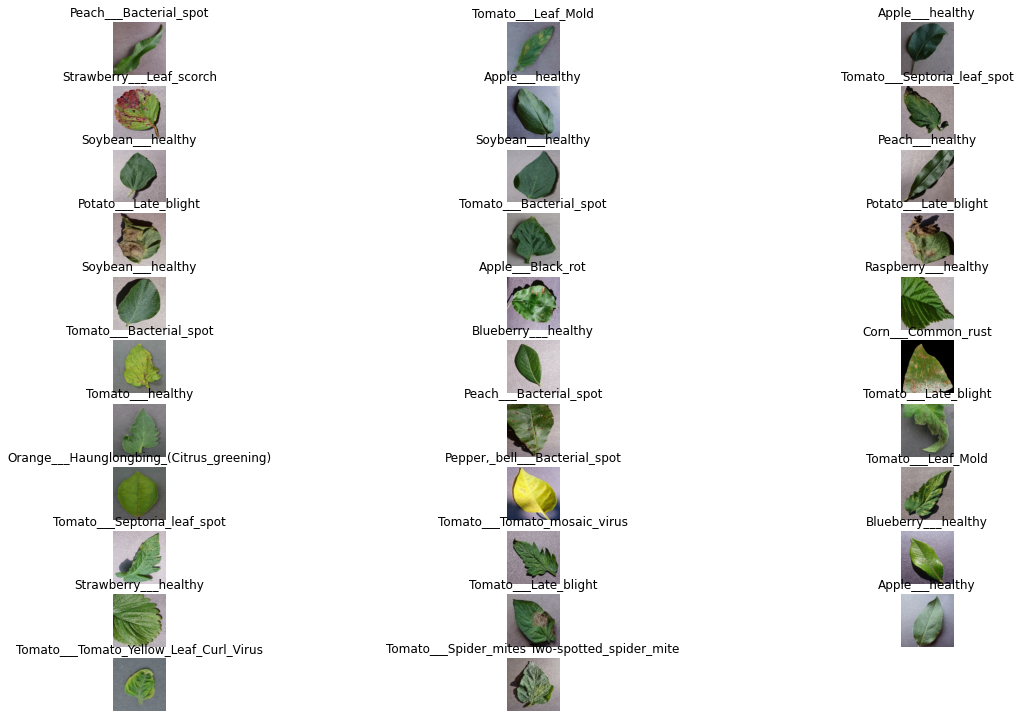

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(13, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")